<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for immage classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [70]:
# import tensorflow and kera
import tensorflow
from tensorflow import keras
from keras.datasets import cifar10
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [4]:
from keras.callbacks import TensorBoard

## Load data
Use the **Keras**' load method.

In [43]:
(X_train_all, t_train_all), (X_test_all, t_test_all) = cifar10.load_data()

In [44]:
# take a small sample of data
size = 50000
X_train = X_train_all[:size,:,:,:]
t_train = t_train_all[0:size,:]
X_test = X_test_all[0:size,:,:,:]
t_test = t_test_all[0:size,:]

In [45]:
classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck')

## Check some data

In [46]:
def check_one(data, label, id = None, actual = None, compare = False):
    # check one
    if id is None:
        id = np.random.randint(data.shape[0])
    im = data[id]
    plt.figure(figsize = (3, 3))
    plt.imshow(im)
    
    l_id = label[id]
    if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
        a_id = np.argmax(actual[id])
        plt.title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
    else:
        plt.title('Class %d (%s)' % (l_id, classes[l_id]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [47]:
def check_ten(data, label, actual = None, compare = False):
    # check ten
    fig, ax = plt.subplots(2, 5, figsize = (11, 5))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.2)
    fig.suptitle('Check Data', fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})

    ids = np.random.randint(data.shape[0], size = 10)
    r = 0
    c = 0
    for id in ids:
        im = data[id]

        # original image
        ax[r, c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r, c].set_title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
        else:
            ax[r, c].set_title('Class %d (%s)' % (l_id, classes[l_id]))
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
        c += 1
        if c > 4:
            r += 1
            c = 0

    plt.show()

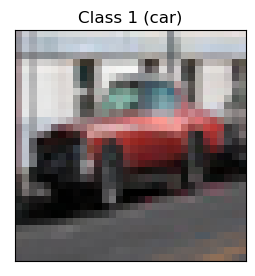

In [48]:
check_one(X_train, t_train.flatten())

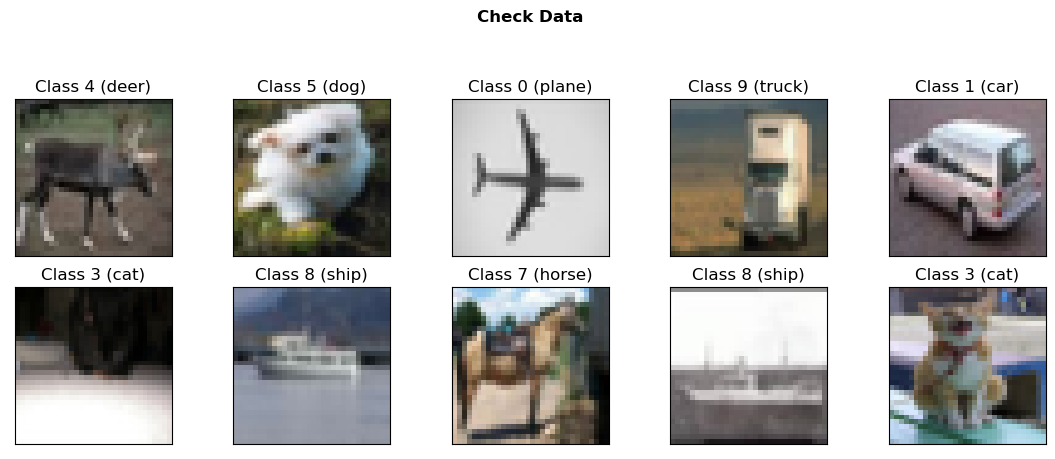

In [49]:
check_ten(X_train, t_train.flatten())

## Prepare data

In [50]:
# Prepare input data
_, img_rows, img_cols, img_channels = X_train.shape
num_classes = len(set(t_train.flatten()))

# Convert the target to categorical
y_train = to_categorical(
    t_train,
    num_classes = num_classes,
    dtype = 'uint8')
y_test = to_categorical(
    t_test,
    num_classes = num_classes,
    dtype = 'uint8')

In [51]:
t_train[0]

array([6], dtype=uint8)

In [52]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [53]:
model = Sequential()

In [54]:
model.add(Conv2D(48, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(Conv2D(48, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(96, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(192, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [55]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 48)        1344      
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 48)        20784     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 48)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 15, 15, 48)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 15, 15, 96)        41568     
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 96)        83040     
                                                      

## Compile the model

In [56]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

## Fit the training data

In [34]:
tensorboard = TensorBoard(log_dir = 'logs')

In [21]:
%%time
# Fit the model on a training set
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    # epochs = 100,
    epochs = 100,
    # batch_size = 100,
    batch_size = 100,
    callbacks = [tensorboard],
    verbose = 1)
print(f'Training accuracy:{history.history["accuracy"][-1]:.2f} validation accuracy:{history.history["val_accuracy"][-1]:.2f} ')

Epoch 1/100
400/400 [==============================] - 241s 579ms/step - loss: 2.1662 - accuracy: 0.2050 - val_loss: 1.7891 - val_accuracy: 0.3155
Epoch 2/100
400/400 [==============================] - 230s 575ms/step - loss: 1.6518 - accuracy: 0.3835 - val_loss: 1.4001 - val_accuracy: 0.4829
Epoch 3/100
400/400 [==============================] - 451s 1s/step - loss: 1.4527 - accuracy: 0.4724 - val_loss: 1.2838 - val_accuracy: 0.5467
Epoch 4/100
400/400 [==============================] - 451s 1s/step - loss: 1.2974 - accuracy: 0.5370 - val_loss: 1.1112 - val_accuracy: 0.6119
Epoch 5/100
400/400 [==============================] - 444s 1s/step - loss: 1.2076 - accuracy: 0.5775 - val_loss: 1.0233 - val_accuracy: 0.6466
Epoch 6/100
400/400 [==============================] - 445s 1s/step - loss: 1.1182 - accuracy: 0.6136 - val_loss: 0.9491 - val_accuracy: 0.6712
Epoch 7/100
400/400 [==============================] - 444s 1s/step - loss: 1.0483 - accuracy: 0.6377 - val_loss: 1.0036 - val_acc

### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit. 
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [35]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 11380), started 6 days, 0:16:54 ago. (Use '!kill 11380' to kill it.)

## Create predictions

In [66]:
%%time
y_pred_prob = model.predict(X_test)
predictions = (y_pred_prob > 0.5).astype(int)

313/313 [==============================] - 12s 37ms/step
Wall time: 13.2 s


## Evaluate the model

In [67]:
score = model.evaluate(X_test, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

1000/1000 [==============================] - 23s 22ms/step - loss: 0.9363 - accuracy: 0.5988

Test loss: 0.936282, Test accuracy: 0.598800


In [68]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_c = ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c = '%%%dd ' % d_size
        s = '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%%%dd| ' % d_size
            s = s % i
            s += c * len(r)
            print(s % tuple(r))

In [73]:
# Encode labels in y_test to integers
le = LabelEncoder()
y_test_encoded = np.argmax(y_test, axis=1)


In [74]:
# Convert integers to one-hot encoded labels
y_test_one_hot = to_categorical(y_test_encoded)

In [76]:
# Make predictions on X_test
predictions = model.predict(X_test)

# Convert probability distributions to class predictions
predictions = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_one_hot.argmax(axis=1), predictions)

313/313 [==============================] - 11s 36ms/step


In [77]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

   |   0   1   2   3   4   5   6   7   8   9 
---------------------------------------------
  0| 682  24  56  22  21   0  11   8 148  28 
  1|   7 857   5  14   2   0  17   3  43  52 
  2|  99  10 334  97 183  24 206  12  24  11 
  3|  22  16  76 371  98  38 297  20  34  28 
  4|  34   6  37  57 585   3 203  56  10   9 
  5|   9   6  78 350  88 242 163  41  11  12 
  6|   8   7  29  31  37   2 864   1  19   2 
  7|  26   5  18 131 141  28  41 559   8  43 
  8|  87  39  14  22   9   1  15   1 800  12 
  9|  36 132   5  25   5   0  27   6  70 694 


## Visualisation of cost

In [110]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

KeyError: 'accuracy'

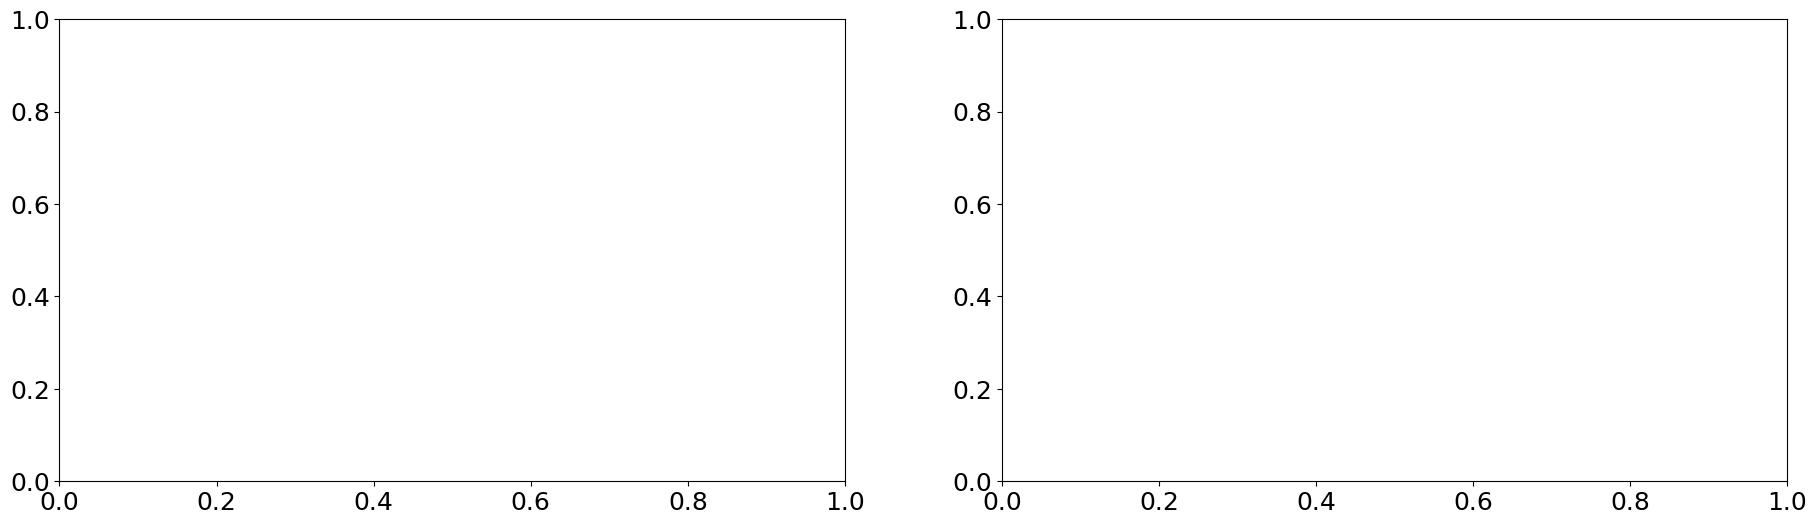

In [117]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(model.history.history['accuracy'])
ax[0].plot(model.history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(model.history.history['loss'])
ax[1].plot(model.history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()


## Results

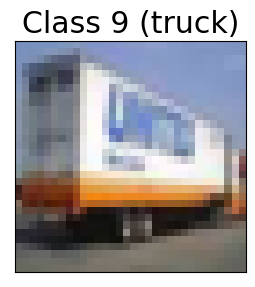

In [108]:
check_one(X_test, predictions, actual = y_test, compare = True)

In [94]:
import os

if not os.path.exists('../data'):
    os.makedirs('../data')
    
# save model
model_json = model.to_json()
with open('../data/model.json', 'w') as json_file:
    json_file.write(model_json)
    
# save weights
model.save_weights('../data/model.h5')

In [95]:
from keras.models import model_from_json

In [99]:
# # create a new model
new_model = Sequential()

In [102]:
# load model
with open('../data/model.json', 'r') as json_file:
    model_json = json_file.read()
new_model = model_from_json(model_json)

# load weights
new_model.load_weights('../data/model.h5')


In [103]:
# # compile the new model
new_model.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



